<a href="https://colab.research.google.com/github/envgp/taking_the_pulse_of_the_planet/blob/main/notebooks/pulse_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: Taking the Pulse of the Cryosphere - Using ice-penetrating radar to understand how ice sheets work

Dustin Schroeder (Dustin.M.Schroeder@stanford.edu) and Thomas Teisberg (teisberg@stanford.edu), Stanford Radio Glaciology

This week we'll turn our attention to the polar regions of the Earth and think about Earth's ice sheets -- Antarctica and Greenland.

The Antarctic Ice Sheet consists of up to almost 5 kilometers of ice sitting on top of bedrock. All of this ice masks the shape of that bedrock from most of our usual sensing techniques, but, as you've seen in class, ice-penetrating radar (IPR) can be used to see "through" the ice. One of the main uses of IPR is mapping this bedrock, but IPR can do much more than just map the geometry of bedrock.

In this notebook, you will explore radiometric interpretation of bed reflections. Or, put another way, you'll think about how to interpret not just where the bedrock (or ocean) is under the ice but also how brightly it reflects.

You can think of this sort of like going from looking at a topographic map to looking at a satellite image. The topographic map shows you the elevation of everything, but the satellite image can also tell you if an area is a forest, a desert, or a road.

⏲ The first few cells will take a few minutes to run. Go ahead and start running the first 4 cells. While they're running, read through the rest of the notebook. You may see an error that your session crashed and is restarting. Not to worry... that's normal. :) (It's explained below.)

In [ ]:
!pip uninstall -y matplotlib numpy scipy

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3


In [ ]:
!git config --global http.postBuffer 4194304000

In [ ]:
!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-X69.git

Cloning into 'taking-the-pulse-cryosphere-X69'...
tcmalloc: large alloc 4194304000 bytes == 0x565185488000 @  0x7feed664c680 0x7feed666d824 0x5651843ccfaa 0x565184337899 0x565184337feb 0x565184335ebe 0x7feed62df083 0x565184335f2e
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
tcmalloc: large alloc 1573068800 bytes == 0x5596c2b5c000 @  0x7fac5111b680 0x7fac5113c824 0x5596c111374a 0x5596c11137ad 0x5596c0fbb51b 0x5596c0fbc038 0x5596c0f172f4 0x5596c0f183b4 0x5596c0f16e9e 0x7fac50e3d083 0x5596c0f16f0e
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 862.11 MiB | 6.20 MiB/s, done.


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


**⏸ Wait here for a second.** This notebook uses condacolab to manage dependencies. Wait for the cell above to finish running before starting the following cells. You'll get a warning like this, which you can safely dismiss (press the "X"):
> "Your session crashed for an unknown reason."

Then run the next few cells. 

In [ ]:
!mamba install -c conda-forge numpy matplotlib==3.6.2 xarray cartopy==0.21.1 ipympl==0.9.2 ipywidgets==8.0.4


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['numpy', 'matplotlib==3.6.2', 'xarray', 'cartopy==0.21.1', 'ipympl==0.9.2', 'ipywidgets==8.0.4']

[

In [ ]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import scipy.constants
import ipywidgets
import pandas as pd

from google.colab import output # Support for custom widgets in Colab (needed for Cartopy maps)
output.enable_custom_widget_manager()

/usr/local/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [ ]:
# This cell is here to make sure we've loaded the right versions of everything. The output you should see if commented at the bottom.

import matplotlib
print(matplotlib.__version__)
import ipympl
print(ipympl.__version__)
import ipywidgets
print(ipywidgets.__version__)
import cartopy
print(cartopy.__version__)

# Desired output is:
# 3.6.2
# 0.9.2
# 8.0.4
# 0.21.1

3.6.2
0.9.2
8.0.4
0.21.1


## Getting to know the data

The dataset we'll use here comes from a paper that re-analyzed two ice-penetrating radar surveys near the Thwaites and Pine Island glaciers in West Antarctica. The source of this data is the US Antarctic Program Data Center:

> Chu, W., Culberg, R., Hilger, A., Jordan, T., Schroeder, D., Seroussi, H., et al. (2021) "Radar Sounding Observations of the Amundsen Sea Embayment, 2004-2005" U.S. Antarctic Program (USAP) Data Center. doi: https://doi.org/10.15784/601436. 

We've done some minimal preprocessing on this data and provided you with 6 "lines" of data. The one we'll work with on Thursday is "X69a". For your homework, you'll one of the other lines (your choice).

The background of the map below shows the surface velocity. The six lines show you the locations of the datasets available to you. Find "X69a" on this plot. You'll come back to this plot later to for your homework.

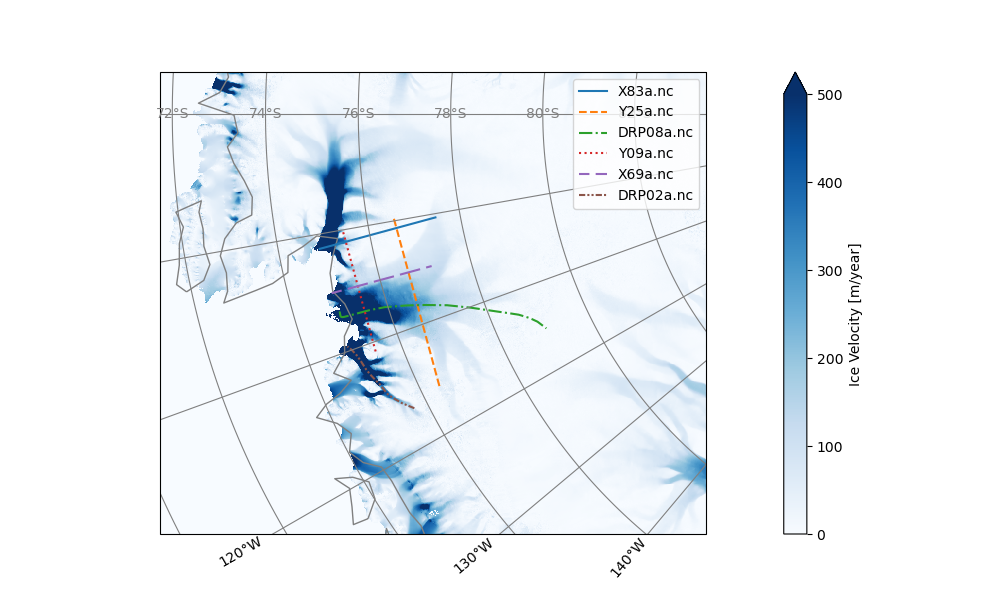

**Note from Michael**: When you do your homework assignment, you will be asked to pick a new dataset. Because these files are larged, I have stored them individually. When it comes time to do the homework, I recommend uncommenting (remove the pound sign in the front of one of the lines) the below commands one at a time and trying each file until you find one that you find interesting. If you uncomment them all and try load them in all at once, it will A) take a long time and B) Google Colab might break.


You do not need to touch the below cell at all during class, we have already loaded in the in-class example data.

In [ ]:
#!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-X83.git
#!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-Y09.git
#!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-Y25.git
#!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-DRP02.git
#!git clone https://premonition.stanford.edu/mmorphew/taking-the-pulse-cryosphere-DRP08.git

Cloning into 'taking-the-pulse-cryosphere-DRP08'...
tcmalloc: large alloc 4194304000 bytes == 0x55cbd21ba000 @  0x7f04500b2680 0x7f04500d3824 0x55cbcfd2cfaa 0x55cbcfc97899 0x55cbcfc97feb 0x55cbcfc95ebe 0x7f044fd45083 0x55cbcfc95f2e
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
tcmalloc: large alloc 3370631168 bytes == 0x55b8571c0000 @  0x7f53c9e93680 0x7f53c9eb4824 0x55b854e3c74a 0x55b854e3c7ad 0x55b854ce451b 0x55b854ce5038 0x55b854c402f4 0x55b854c413b4 0x55b854c3fe9e 0x7f53c9bb5083 0x55b854c3ff0e
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 1.78 GiB | 6.33 MiB/s, done.


In [ ]:
# If you download a new file from above, make sure you change the dataset location
# in the line of code below!
radar_data = xr.open_dataset("taking-the-pulse-cryosphere-x69/X69a.nc")


Take a minute to explore these datasets. To see what's inside each one, simply type its name in an empty cell like this:

In [ ]:
radar_data

<xarray.Dataset>
Dimensions:             (along-track sample: 15351, range sample: 3200)
Coordinates:
    latitude            (along-track sample) float64 ...
    longitude           (along-track sample) float64 ...
    x                   (along-track sample) float64 ...
    y                   (along-track sample) float64 ...
    distance            (along-track sample) float64 ...
Dimensions without coordinates: along-track sample, range sample
Data variables:
    elevation           (along-track sample) float64 ...
    fast-time           (along-track sample, range sample) float64 ...
    data_hi_gain        (along-track sample, range sample) float64 ...
    data_lo_gain        (along-track sample, range sample) float64 ...
    radar_height        (along-track sample) float64 ...
    ice_thickness       (along-track sample) float64 ...
    relative_bed_power  (along-track sample) float64 ...
    depth               (along-track sample, range sample) float64 ...
Attributes:
    Instrument:        HiCARS
    Flight Transect:   X69a
    Original Dataset:  Chu, W., Culberg, R., Hilger, A., Jordan, T., Schroede...
    Notes:             Prepared for Stanford GP115. Does not include all orig...

## (Optional) Mini-Exercise 1

Map projections are ways of displaying locations from the curved surface of the Earth on a 2D image. Different projections are used for different applications. Antarctica (and the Arctic) present unique challenges because most map projections significantly distort the polar regions.

**Part (a):** Using cartopy, make a map of the world using the (default) PlateCarree projection. Include the `cf.COASTLINE` and `cf.OCEAN` features in your map. [Hints: try looking at any of the trend maps you've done recently as a starting point for making a world map in Python. Our trend maps are plotted on a world map, so if we take away from the line of code that plots the trend map, what are we left with? You already have the line of code for `cf.COASTLINE`, can you reuse that line of code for `cf.OCEAN`?]

**Part (b):** Using cartopy, make a map of the world using the EPSG:3031 projection (defined below). For this map, zoom into Antarctica by setting the extent like this:

```ax.set_extent([-10e6, 10e6, -10e6, 10e6], crs=crs_epsg3031)```

You can read about this projection here: https://epsg.io/3031

In [ ]:
crs_epsg3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71) # South Polar Stereographic -- https://epsg.io/3031

In [ ]:
## FILL IN PART (A) HERE

In [ ]:
## FILL IN PART (B) HERE

#ax.set_extent([-10e6, 10e6, -10e6, 10e6], crs=crs_epsg3031)

## (Optional) Mini-Exercise 2

We'll use some linear interpolations as a way for you to define some functions. Use the cell below to experiment with how changing the interpolation points impacts the function you create.

Feel free to also try changing the interpolation type if you like.

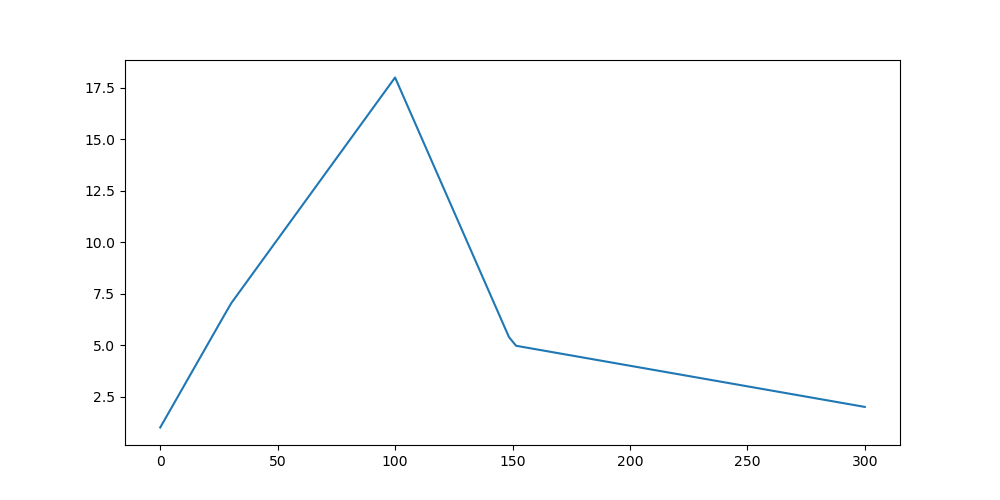

In [ ]:
example_interpolated_value = scipy.interpolate.interp1d(
    x = [0,   30,   100,    150,    250],
    y = [1,   7,    18,     5,      3],
    kind='linear', fill_value="extrapolate"
)

xs = np.linspace(0, 300, 100)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.plot(xs, example_interpolated_value(xs))

## Plotting the study area

We're going to look at some data from Thwaites Glacier. Thwaites is among the most studied glaciers in Antarctica.

To start, let's plot the location of our data on a map, using the EPSG:3031 projection previously explored.

/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


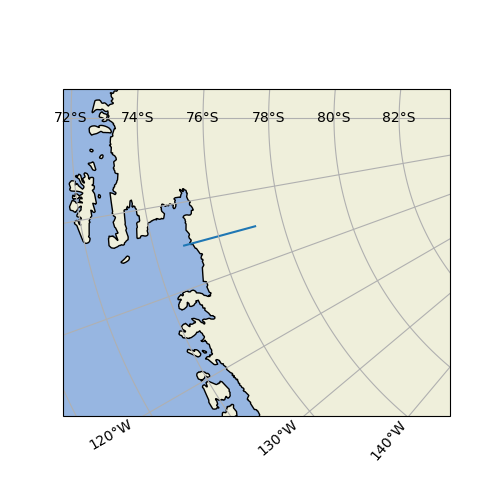

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = crs_epsg3031)
ax.plot(radar_data['x'], radar_data['y'])
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.gridlines(draw_labels=True) # Add gridlines to make latitudes/longitudes

ax.set_aspect('equal')
ax.set_xlim(-2e6,-0.7e6)
ax.set_ylim(-10e5,1e5)
plt.show()

The "depth" axis of the radar data is actually provided to us as something called "fast time." This corresponds to the two-way travel time for the echo to bounce off of something and return to the radar instrument. Electromagnetic waves travel at the speed of light, but the speed of light is different in air versus in ice. To account for this, we use the ice surface location in mapping the two-way travel time to real distances.

We've already taken care of this for you in this dataset.

In [ ]:
# To reduce memory usage and plot faster, we subsample the data. You can play with the amount of subsampling if you want.

subsampling_st, subsampling_ft = 10, 5

<ipython-input-12-b4899605df1e>:2: UserWarning: The following kwargs were not used by contour: 'shading'
  pcm = ax.contourf(radar_data['distance'][::subsampling_st]/1e3, radar_data["fast-time"][0,::subsampling_ft]*1e6, radar_data['depth'][::subsampling_st, ::subsampling_ft].T, shading='nearest')


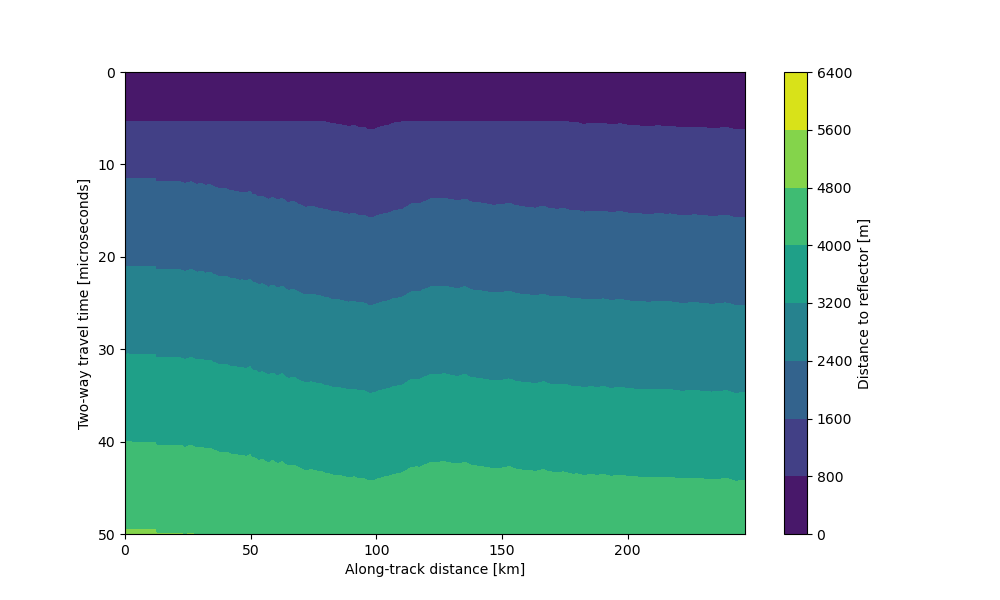

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
pcm = ax.contourf(radar_data['distance'][::subsampling_st]/1e3, radar_data["fast-time"][0,::subsampling_ft]*1e6, radar_data['depth'][::subsampling_st, ::subsampling_ft].T, shading='nearest')
clb = fig.colorbar(pcm, ax=ax)
clb.set_label('Distance to reflector [m]')
ax.set_xlabel('Along-track distance [km]')
ax.set_ylabel('Two-way travel time [microseconds]')
ax.set_ylim(50, 0)
plt.show()

<ipython-input-13-8eea9c009e4d>:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(along_track_distance[::subsampling_st, ::subsampling_ft]/1e3, radar_data['depth'][::subsampling_st, ::subsampling_ft], 20*np.log10(radar_data['data_hi_gain'][::subsampling_st, ::subsampling_ft]), shading='nearest')


<AxesSubplot: xlabel='Along-track distance [km]', ylabel='Depth [m]'>

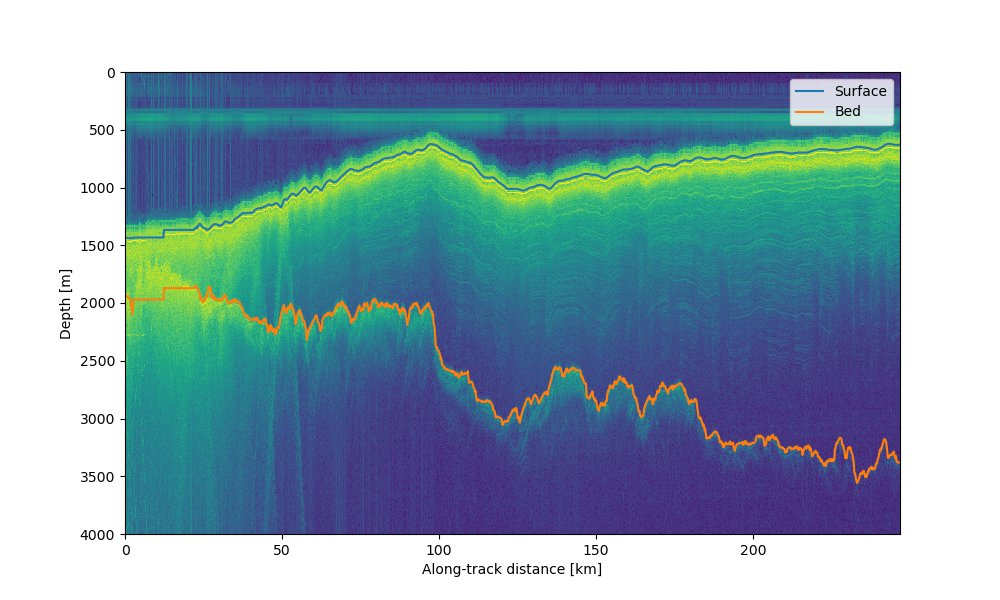

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
along_track_distance = np.expand_dims(radar_data['distance'], axis=1)
along_track_distance = np.repeat(along_track_distance, radar_data.dims['range sample'], axis=1)
ax.pcolormesh(along_track_distance[::subsampling_st, ::subsampling_ft]/1e3, radar_data['depth'][::subsampling_st, ::subsampling_ft], 20*np.log10(radar_data['data_hi_gain'][::subsampling_st, ::subsampling_ft]), shading='nearest')
ax.plot(radar_data['distance'][::subsampling_st]/1e3, radar_data['radar_height'][::subsampling_st], label="Surface")
ax.plot(radar_data['distance'][::subsampling_st]/1e3, radar_data['ice_thickness'][::subsampling_st] + radar_data['radar_height'][::subsampling_st], label="Bed")
ax.set_ylim(4000, 0)
ax.set_xlabel('Along-track distance [km]')
ax.set_ylabel('Depth [m]')
ax.legend()
ax

Above is the "radargram" of the data you'll be using. In class, Dusty talked a bit about how to interpret what's happening in this data.

When you re-run this notebook for your homework, you should pause here and think about what you're looking at. Feel free to also return to the map of where the data lines are to understand the broader context.

## Attenuation, reflectivity, and ice thickness

This dataset is nice in that the bed return power and ice thickness have already been extracted out. Let's go ahead and plot those values.

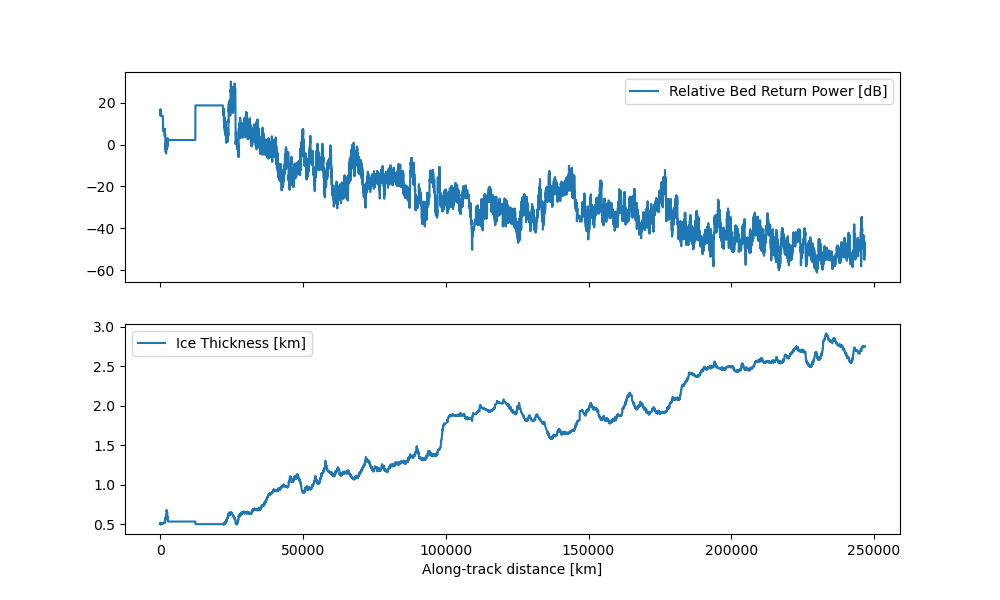

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10,6), sharex=True)
axs[0].plot(radar_data['distance'], radar_data["relative_bed_power"], label="Relative Bed Return Power [dB]")
axs[1].plot(radar_data['distance'], radar_data['ice_thickness']/1e3, label="Ice Thickness [km]")
axs[1].set_xlabel('Along-track distance [km]')
axs[0].legend()
axs[1].legend()
plt.show()

As you learned in class, the bed return power is a combination of the reflectivity of the bed (a property of what's under the ice -- water, bedrock, sediment, etc) and the attenuation through the ice.

You're going to explore a simple version of the technique described in the paper below for estimating the radar attenuation rate and bed reflectivity.

> Schroeder, D. M., Seroussi, H., Chu, W. & Young, D. A. Adaptively constraining radar attenuation and temperature across the Thwaites Glacier catchment using bed echoes. J. Glaciol. 62, 1075–1082 (2016). http://dx.doi.org/10.1017/jog.2016.100

**Just a note**: Don't worry about understanding all of the code in the next cell. We don't expect you to edit it. Just focus on understanding and using the interactive widget it creates.

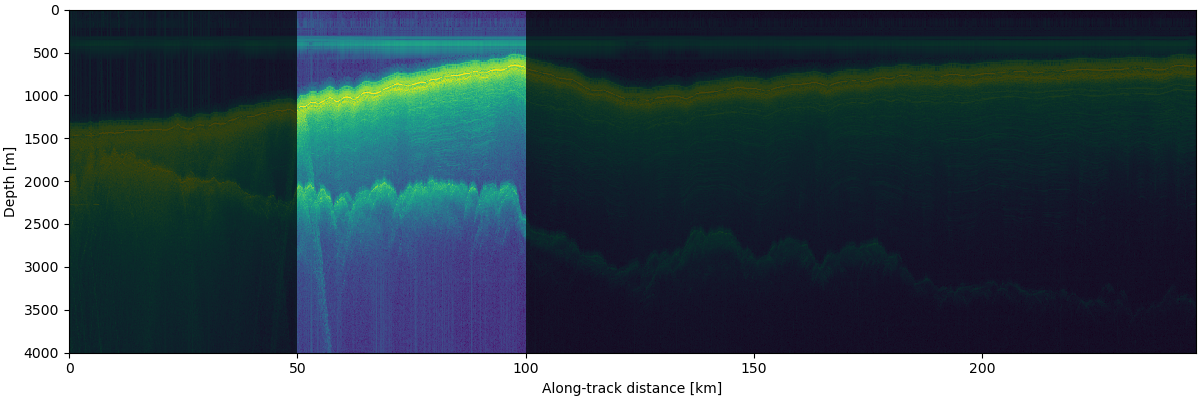

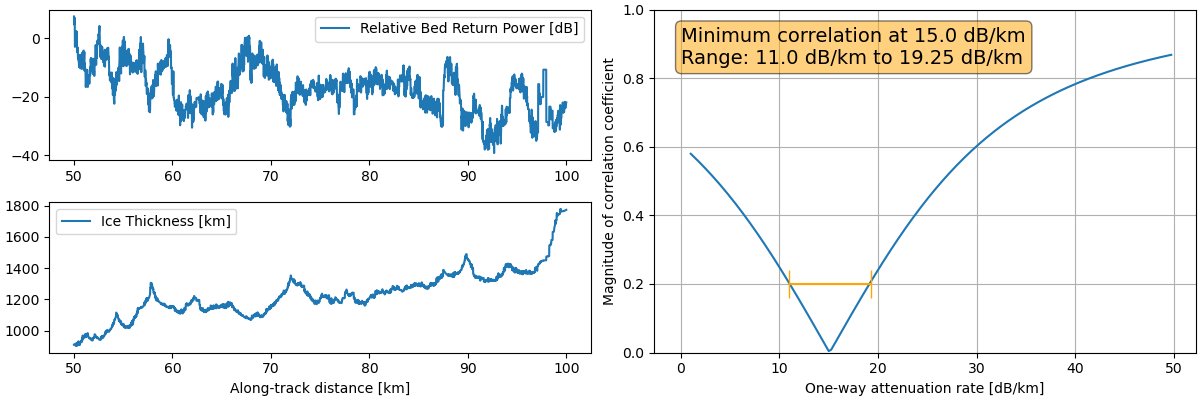

In [ ]:
correlation_threshold = 0.2

time_range_slider = ipywidgets.FloatRangeSlider(
                        value=[50,100],
                        min=0, max=np.max(radar_data['distance'])/1e3,
                        step=0.1, description='Section [km]:',
                        continuous_update=False, orientation='horizontal',
                        layout=ipywidgets.Layout(width='90%')
                    )

output_radargram = ipywidgets.Output()

with output_radargram:
    subsampling_st, subsampling_ft = 10, 5

    fig_radargram, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
    ax.pcolormesh(along_track_distance[::subsampling_st, ::subsampling_ft]/1e3, radar_data['depth'][::subsampling_st, ::subsampling_ft], 20*np.log10(radar_data['data_hi_gain'][::subsampling_st, ::subsampling_ft]), shading='nearest')
    ax.set_ylim(4000, 0)
    ax.set_xlabel('Along-track distance [km]')
    ax.set_ylabel('Depth [m]')
    
    overlay_left = patches.Rectangle((0,0), -1*np.max(radar_data['distance']), 4000, alpha=0.7, color='black', linewidth=0)
    overlay_right = patches.Rectangle((np.max(radar_data['distance']), 0), np.max(radar_data['distance']), 4000, alpha=0.7, color='black', linewidth=0)
    ax.add_patch(overlay_left)
    ax.add_patch(overlay_right)
    
    
    ax_radargram = ax

output_corr = ipywidgets.Output()

with output_corr:
    mosaic = [['power', 'corr'],
              ['thick', 'corr']]
    fig_corr = plt.figure(figsize=(12,4), constrained_layout=True)
    axs_corr = fig_corr.subplot_mosaic(mosaic)
    
    # Bed power, ice thickness
    bed_power_line, = axs_corr['power'].plot(radar_data['distance']/1e3, radar_data['relative_bed_power'], label="Relative Bed Return Power [dB]")
    ice_thickness_line, = axs_corr['thick'].plot(radar_data['distance']/1e3, radar_data['ice_thickness']/1e3, label="Ice Thickness [km]")
    axs_corr['thick'].set_xlabel('Along-track distance [km]')
    axs_corr['thick'].legend()
    axs_corr['power'].legend()
    
    axs_corr['thick'].sharex(axs_corr['power'])
    
    # Correlation
    atten_rates = np.arange(1, 50, 0.25) # dB/km
    corr_coefs = np.zeros_like(atten_rates)
    corr_line, = axs_corr['corr'].plot(atten_rates, corr_coefs)
    corr_error = axs_corr['corr'].errorbar([0], [0], xerr=[0.2])
    corr_text = axs_corr['corr'].text(0.05, 0.95, "", transform=axs_corr['corr'].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
    axs_corr['corr'].set_xlabel('One-way attenuation rate [dB/km]')
    axs_corr['corr'].set_ylabel('Magnitude of correlation coefficient')
    axs_corr['corr'].set_ylim(0, 1)
    axs_corr['corr'].grid()
    
def update(change):
    global corr_error
    # Update radargram
    overlay_left.xy = (time_range_slider.value[0], 0)
    overlay_right.xy = (time_range_slider.value[1], 0)
    fig_radargram.canvas.draw()
    
    # Update correlation plots
    start_idx, stop_idx = np.argmin(np.abs(radar_data['distance'].to_numpy() - time_range_slider.value[0]*1e3)), np.argmin(np.abs(radar_data['distance'].to_numpy() - time_range_slider.value[1]*1e3))
    bed_power_segment = radar_data['relative_bed_power'][start_idx:stop_idx]
    thickness_segment = radar_data['ice_thickness'][start_idx:stop_idx]

    for idx, atten_rate in enumerate(atten_rates):
        bed_reflectivity_segment = bed_power_segment + (thickness_segment/1e3 * atten_rate * 2)
        corr_coefs[idx] = scipy.stats.pearsonr(bed_reflectivity_segment, thickness_segment).statistic
        
    bed_power_line.set_data(radar_data['distance'][start_idx:stop_idx]/1e3, bed_power_segment)
    ice_thickness_line.set_data(radar_data['distance'][start_idx:stop_idx]/1e3, thickness_segment)
    
    axs_corr['power'].relim()
    axs_corr['power'].autoscale()
    axs_corr['thick'].relim()
    axs_corr['thick'].autoscale()
        
    corr_line.set_data(atten_rates, np.abs(corr_coefs))

    # Calculate matching range
    atten_rate_min = atten_rates[np.argmin(np.abs(corr_coefs))]
    atten_rate_lower = atten_rates[np.argmin(np.abs(corr_coefs + correlation_threshold))]
    atten_rate_upper = atten_rates[np.argmin(np.abs(corr_coefs - correlation_threshold))]
    # Remove old error bar
    corr_error[0].remove()
    for line in corr_error[1]:
        line.remove()
    for line in corr_error[2]:
        line.remove()
    # Add a new one
    corr_error = axs_corr['corr'].errorbar([(atten_rate_lower+atten_rate_upper)/2],
                                           [correlation_threshold], xerr=[(atten_rate_upper-atten_rate_lower)/2],
                                           color='orange', capsize=10)
    # Update text
    corr_text.set_text(f"Minimum correlation at {atten_rate_min} dB/km\nRange: {atten_rate_lower} dB/km to {atten_rate_upper} dB/km")
    
    fig_corr.canvas.draw()

    
time_range_slider.observe(update, 'value')

update(None)

display(ipywidgets.VBox([output_radargram, time_range_slider, output_corr]))

## In-class exercise

Use the interactive tool above to find plausible lower and upper bounds on the attenuation rate. Plug those values into the two linear interpolations below.

In [ ]:
# Create interpolations of the lower and upper bounds you feel are reasonable for the attenuation rate as a function of distance along the track

attenuation_rate_lower_bound = scipy.interpolate.interp1d(
    x = [0,   100,  250],
    y = [15,    6,    5],
    kind='linear', fill_value="extrapolate"
)
attenuation_rate_upper_bound = scipy.interpolate.interp1d(
    x = [0,   100,  250],
    y = [40,   20,   15],
    kind='linear', fill_value="extrapolate"
)

In [ ]:
# Optionally select a subset of the data to "zoom in" on and analyze in more detail. Skip this on your first time through and then return to it after.
subset_start, subset_end = None, None # For example: 100, 150 (for the range 100 km to 150 km)
#subset_start, subset_end = 25, 70

In [ ]:
est_reflectivity_upper = np.array([pwr - (2*thick_km*attenuation_rate_lower_bound(d_km)) for pwr, thick_km, d_km in zip(radar_data['relative_bed_power'], radar_data['ice_thickness']/1e3, radar_data['distance']/1e3)])
est_reflectivity_lower = np.array([pwr - (2*thick_km*attenuation_rate_upper_bound(d_km)) for pwr, thick_km, d_km in zip(radar_data['relative_bed_power'], radar_data['ice_thickness']/1e3, radar_data['distance']/1e3)])

mean_reflectivity = np.mean((est_reflectivity_upper+est_reflectivity_lower)/2)
est_reflectivity_upper -= mean_reflectivity
est_reflectivity_lower -= mean_reflectivity

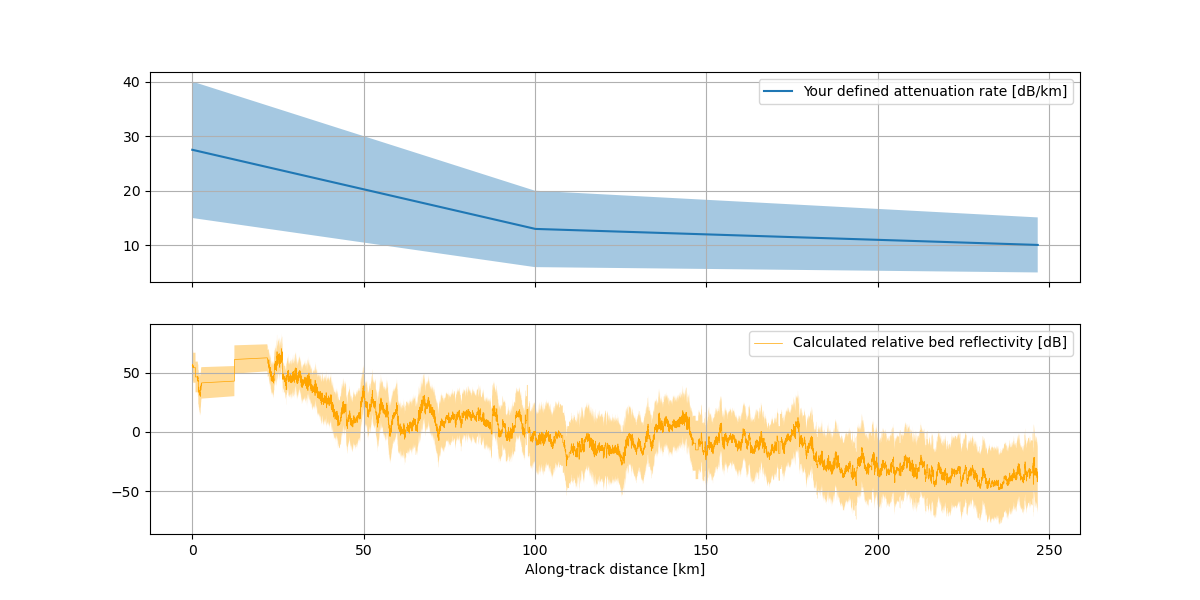

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)

axs[0].fill_between(radar_data['distance']/1e3,
                    attenuation_rate_lower_bound(radar_data['distance']/1e3), attenuation_rate_upper_bound(radar_data['distance']/1e3),
                    alpha=0.4)
axs[0].plot(radar_data['distance']/1e3,
            (attenuation_rate_lower_bound(radar_data['distance']/1e3) + attenuation_rate_upper_bound(radar_data['distance']/1e3))/2,
            label="Your defined attenuation rate [dB/km]")
axs[0].legend()

axs[1].fill_between(radar_data['distance']/1e3,
                    est_reflectivity_upper, est_reflectivity_lower,
                    alpha=0.4, color='orange', edgecolor=None)
axs[1].plot(radar_data['distance']/1e3, (est_reflectivity_upper+est_reflectivity_lower)/2,
            label="Calculated relative bed reflectivity [dB]", color='orange', linewidth=0.5)

axs[1].legend()
axs[1].set_xlabel('Along-track distance [km]')
axs[1].set_xlim(subset_start, subset_end)
axs[0].grid()
axs[1].grid()

For your reference, below is a table showing reflectivities of various relevant materials. Think about what your inferred relative bed reflectivity might mean given the differences in power reflectivities shown below.

Data from:
> Christianson, K. et al. Basal conditions at the grounding zone of Whillans Ice Stream, West Antarctica, from ice‐penetrating radar. JGR Earth Surface 121, 1954–1983 (2016). https://doi.org/10.1002/2015JF003806

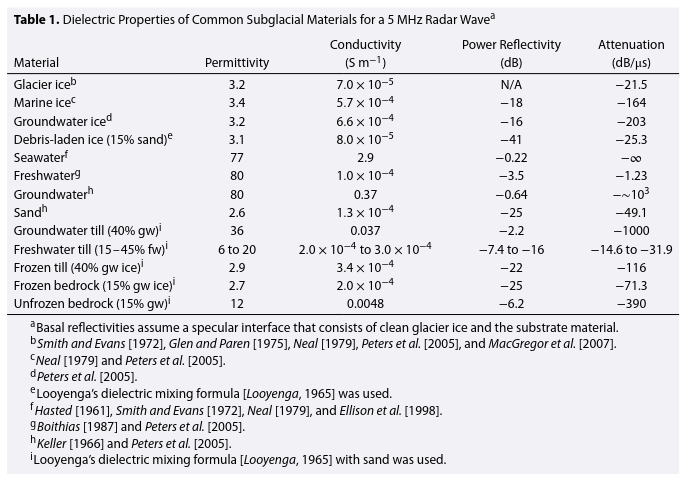

## Accounting for roughness

**It's not critical that you get to this part in class. Before moving on to this section, please show your results from the prior part to Dusty.**

For the homework, you can choose if you'd like to use this part of the notebook or not.

In class, Dusty also described how the roughness of a surface can have an impact on the reflectivity. Looking at your estimated reflectivity from the prior activity, use the cells below to explore how roughness could impact your results.

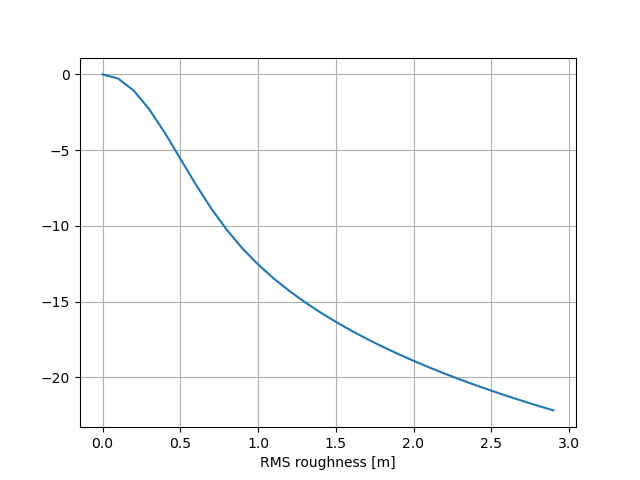

In [ ]:
def roughness_to_loss(roughness, wavelength):
    g = 4 * np.pi * roughness / wavelength
    power_loss_linear = np.exp(-1 * g**2) * scipy.special.i0(g**2 / 2)**2
    return 10*np.log10(power_loss_linear)

wavelength = scipy.constants.speed_of_light / 60e6

roughness_range = np.arange(0, 3, 0.1)

fig, ax = plt.subplots()
ax.plot(roughness_range, roughness_to_loss(roughness_range, wavelength))
ax.set_xlabel('RMS roughness [m]')
ax.grid()

The plot above shows the relationship between RMS roughness as a fraction of the signal wavelength and the expected change in reflectivity. This relationship will be automatically applied for you. This is just for you to see what it looks like.

If you'd like to get a sense of intuitive scales for roughness, check out this paper: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2000JE001429

The radar system used to collect this dataset has a wavelegth in ice of approximately 2.8 meters.

<ipython-input-21-6a5e9ec244bb>:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axs[0].pcolormesh(along_track_distance[idx_start:idx_end:subsampling_st, ::subsampling_ft]/1e3, radar_data['depth'][idx_start:idx_end:subsampling_st, ::subsampling_ft], 20*np.log10(radar_data['data_hi_gain'][idx_start:idx_end:subsampling_st, ::subsampling_ft]), shading='nearest')


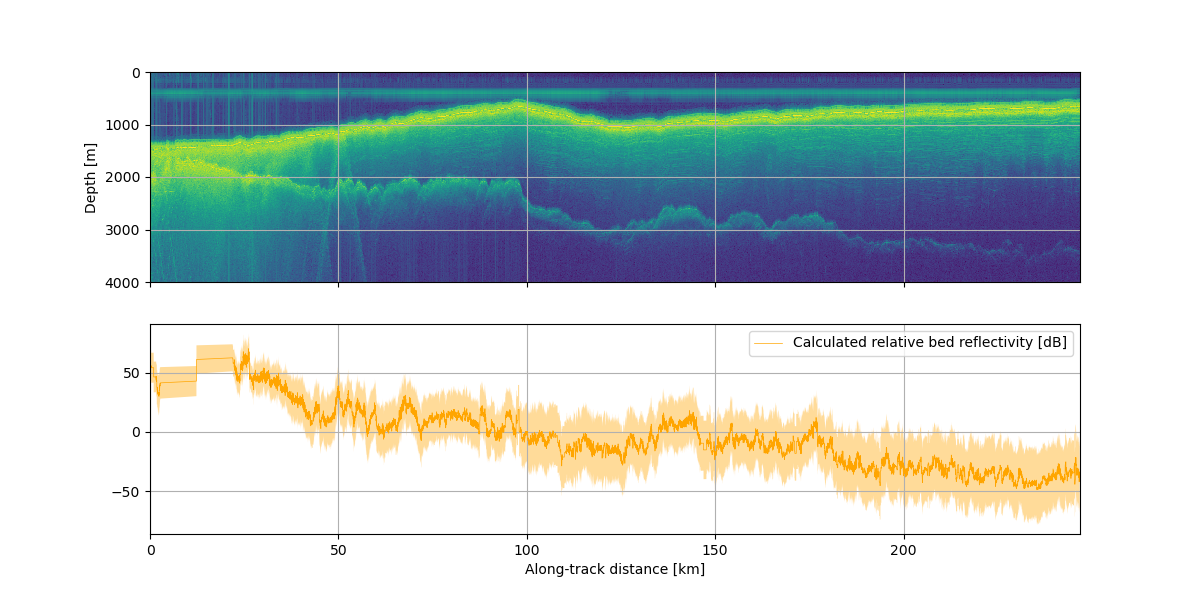

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)

idx_start, idx_end = 0, radar_data.dims['along-track sample']
if subset_start and subset_end:
    idx_start = np.argmin((np.abs(radar_data['distance']/1e3 - subset_start).to_numpy()))
    idx_end = np.argmin((np.abs(radar_data['distance']/1e3 - subset_end).to_numpy()))

subsampling_st, subsampling_ft = 10, 5
axs[0].pcolormesh(along_track_distance[idx_start:idx_end:subsampling_st, ::subsampling_ft]/1e3, radar_data['depth'][idx_start:idx_end:subsampling_st, ::subsampling_ft], 20*np.log10(radar_data['data_hi_gain'][idx_start:idx_end:subsampling_st, ::subsampling_ft]), shading='nearest')
axs[0].set_ylim(4000, 0)
axs[0].set_ylabel('Depth [m]')
    

axs[1].fill_between(radar_data['distance']/1e3,
                    est_reflectivity_upper, est_reflectivity_lower,
                    alpha=0.4, color='orange', edgecolor=None)
axs[1].plot(radar_data['distance']/1e3, (est_reflectivity_upper+est_reflectivity_lower)/2,
            label="Calculated relative bed reflectivity [dB]", color='orange', linewidth=0.5)

axs[1].legend()
axs[1].set_xlabel('Along-track distance [km]')
axs[1].set_xlim(subset_start, subset_end)
axs[0].grid()
axs[1].grid()

As before, fill in the interpolation with values you think are reasonable and look at the results it produces in the cells below.

In [ ]:
# Fill in the interpolation points to define an RMS roughness

rms_roughness = scipy.interpolate.interp1d(
    x = [0,   250],
    y = [1.0, 1.0],
    kind='linear', fill_value="extrapolate"
)

In [ ]:
roughness_loss = roughness_to_loss(rms_roughness(radar_data['distance']/1e3), wavelength)

est_reflectivity_upper_with_roughness = est_reflectivity_upper - roughness_loss
est_reflectivity_lower_with_roughness = est_reflectivity_lower - roughness_loss

mean_reflectivity = np.mean((est_reflectivity_upper_with_roughness+est_reflectivity_lower_with_roughness)/2)
est_reflectivity_upper_with_roughness -= mean_reflectivity
est_reflectivity_lower_with_roughness -= mean_reflectivity

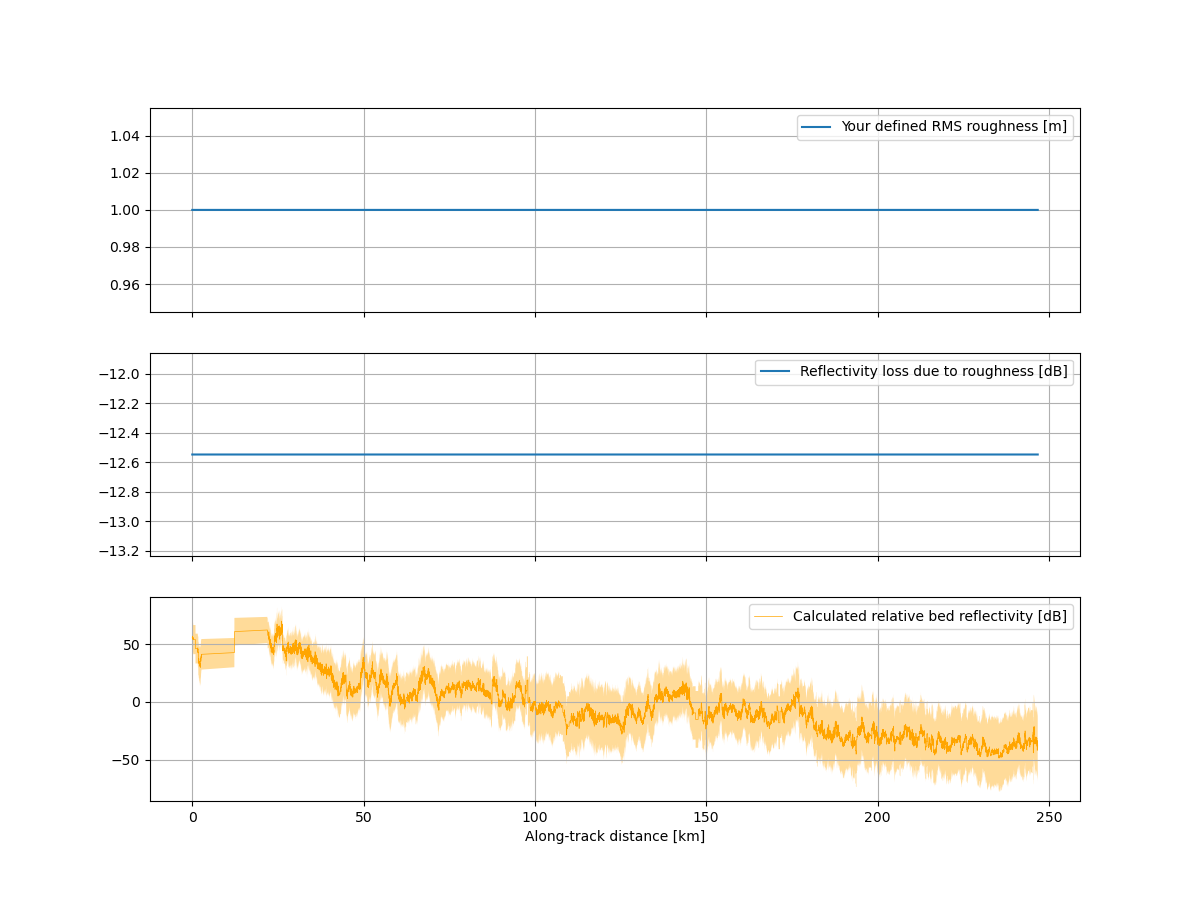

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(12,9), sharex=True)

axs[0].plot(radar_data['distance']/1e3,
            rms_roughness(radar_data['distance']/1e3),
            label="Your defined RMS roughness [m]")
axs[0].legend()

axs[1].plot(radar_data['distance']/1e3, roughness_loss,
            label="Reflectivity loss due to roughness [dB]")
axs[1].legend()

axs[2].fill_between(radar_data['distance']/1e3,
                    est_reflectivity_upper_with_roughness, est_reflectivity_lower_with_roughness,
                    alpha=0.4, color='orange', edgecolor=None)
axs[2].plot(radar_data['distance']/1e3, (est_reflectivity_upper_with_roughness+est_reflectivity_lower_with_roughness)/2,
            label="Calculated relative bed reflectivity [dB]", color='orange', linewidth=0.5)

axs[2].legend()
axs[2].set_xlabel('Along-track distance [km]')
axs[2].set_xlim(subset_start, subset_end)
axs[0].grid()
axs[1].grid()
axs[2].grid()